In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from fastcore.all import *
import cv2
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import shutil

In [23]:
from labeling_test.os_persam import *

2024-01-14 15:16:50.041192: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 15:16:50.041227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 15:16:50.041913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 15:16:50.046944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 15:16:50.766811: W tensorflow/compiler/tf2

In [38]:
im_path = Path(r'/home/hasan/Schreibtisch/projects/Infineon/projects/part2/Current_training_data20240111/images')
msk_path = Path(r'/home/hasan/Schreibtisch/projects/Infineon/projects/part2/Current_training_data20240111/masks')
sn_im_path = Path(r'/home/hasan/Schreibtisch/projects/Infineon/projects/part2/Current_training_data20240111/sn_images')
sn_msk_path = Path(r'/home/hasan/Schreibtisch/projects/Infineon/projects/part2/Current_training_data20240111/sn_masks')

In [10]:
get_name = np.vectorize(lambda x: Path(x).name)
process_name = np.vectorize(lambda x: Path(x).name.replace(' ','_').split('-')[-1])

In [15]:
def get_cntrs_part(img):
    cntrs,_=cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return cntrs


In [35]:
def get_bbox(
    cntr:List[int],
    offset: int = 0):
    'get bounding box from contour'
    bbox = cv2.boundingRect(cntr)
    x, y, w, h = bbox
    y0=y- offset
    y1 = y + h + offset
    x0 = x - offset
    x1 = x + w + offset
    return y0,y1,x0,x1


In [30]:
cntrs = get_cntrs_part(msk)

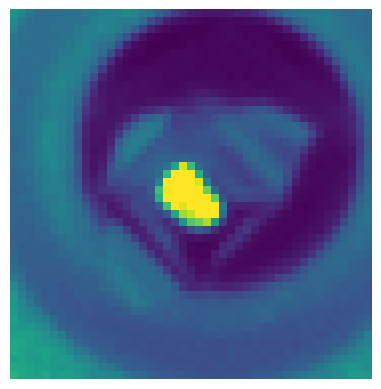

In [36]:
bbox = get_bbox(cntrs[0],10)
y0,y1,x0,x1 = bbox
show_(img[y0:y1,x0:x1])

In [ ]:
img[x, ]

In [24]:
for i in cntrs:
    x, y, w, h = cv2.boundingRect(i)
    

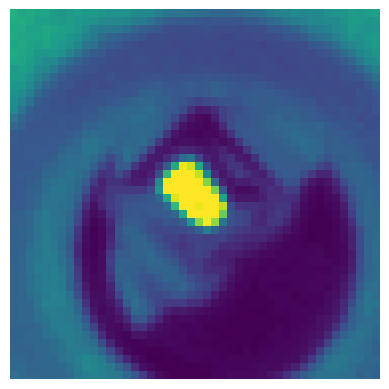

In [27]:
show_(img[y-10:y+h+10, x-10:x+w+10])

In [42]:
for i in tqdm(msk_path.ls()):
    msk = cv2.imread(str(i), cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(str(im_path/Path(i).name),0)
    stem_= Path(i).stem

    cntrs = get_cntrs_part(msk)
    for idx, cn in enumerate(cntrs):
        bbox = get_bbox(cn,10)
        y0,y1,x0,x1 = bbox
        pin_part = img[y0:y1,x0:x1]
        msk_part = msk[y0:y1,x0:x1]
        cv2.imwrite(str(sn_im_path/f'{stem_}_{idx}.png'), pin_part)
        cv2.imwrite(str(sn_msk_path/f'{stem_}_{idx}.png'), msk_part)




  0%|          | 0/5300 [00:00<?, ?it/s]

In [11]:
get_name(im_path.ls())

array(['81643675_VFV4.1.5.2_2022123009530888_ID_00149043637816436752250_In_77_r_1_FRONT_Pass_image1.png',
       'VFV4.1.8.0_2023042615380543_ID_00001047604816874402313_Out_18_r_1_FRONT_Flying Lead-Img_02.png',
       'VFV4.2.0.0_2023041909014580_In_19_DL_Easy_img2_1024_1224_v17_0.8922_Con_r_1_Missing Leadf-Img_02.png',
       ..., 'ID_00040045660814717422137_var_90_In_53_self_name.png',
       'ID_00710048112813534252041_9000241_mean_20_In_43_self_name.png',
       'ID_00955037944810848701827_mean_10_In_17_self_name.png'],
      dtype='<U133')